In [5]:
import numpy as np
import torch
from tqdm import tqdm
import os
import matplotlib.pyplot as plt

In [6]:
f = open('garage_index.csv', 'r')
lines = f.read().splitlines()
f.close()

ga_list = []

for line in lines:
    index, park, lat, lon = line.split(',')
    ga_list.append((int(index), float(lat), float(lon)))
    
ga_size = len(ga_list)    
    
f = open('meter_index.csv', 'r')
lines = f.read().splitlines()
f.close()

me_list = []

for line in lines:
    index, park, lat, lon = line.split(',')
    me_list.append((int(index), float(lat), float(lon)))
    
me_size = len(me_list)

In [26]:
threshold = 1e-2

link_graph_list = [[], []]

line_group_list = []

for ga in tqdm(ga_list):
    group = []
    for me in me_list:
        if ((me[1] - ga[1])**2 + (me[2] - ga[2])**2)**0.5 < threshold:
            link_graph_list[0].append(ga[0])
            link_graph_list[1].append(me[0] + ga_size)
            group.append((ga[1], me[1], ga[2], me[2]))
            
    line_group_list.append(group)
        

100%|██████████| 116/116 [00:00<00:00, 341.32it/s]


In [27]:
link_graph = torch.tensor(link_graph_list)
torch.save(link_graph, 'combine/link.pt')

100%|██████████| 116/116 [00:04<00:00, 24.96it/s]


(22.194, 22.554)

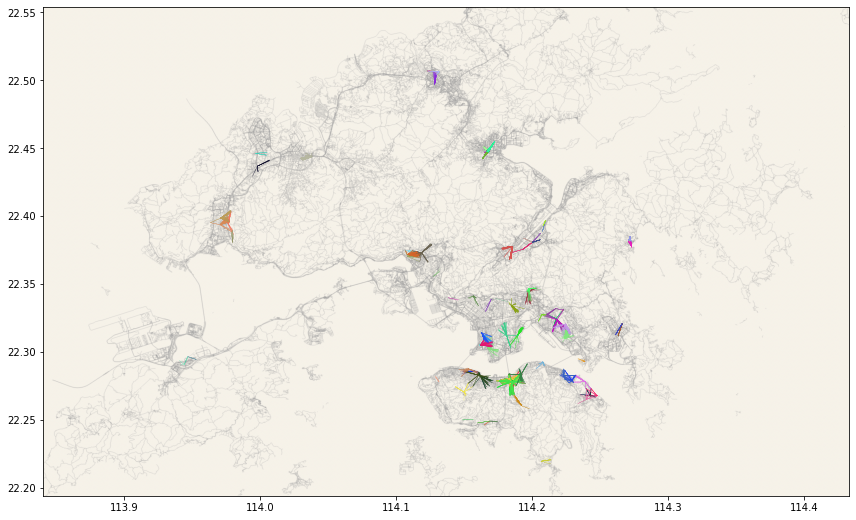

In [28]:
import random

plt.figure(figsize=(15, 9))
bg = plt.imread('hk.png')
plt.imshow(bg, extent=[113.84, 114.433, 22.194, 22.554])

for group in tqdm(line_group_list):
    r = random.randint(16, 255)
    g = random.randint(16, 255)
    b = random.randint(16, 255)
    color = '#%x%x%x'%(r, g, b)
    
    for line in group:
        plt.plot(line[2:], line[:2], '-', color=color, linewidth=0.1)

plt.xlim(113.84, 114.433)
plt.ylim(22.194, 22.554)